# Preprocessing and Cleaning

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("train.csv",index_col="PassengerId")
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Cleaning



## Drop Irrelevant Columns

In [5]:
df = df.drop("Name",axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,female,35.0,1,0,113803,53.1000,C123,S
5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


## Check for missing values

In [7]:
help(df.isna)

Help on method isna in module pandas.core.frame:

isna() -> 'DataFrame' method of pandas.core.frame.DataFrame instance
    Detect missing values.
    
    Return a boolean same-sized object indicating if the values are NA.
    NA values, such as None or :attr:`numpy.NaN`, gets mapped to True
    values.
    Everything else gets mapped to False values. Characters such as empty
    strings ``''`` or :attr:`numpy.inf` are not considered NA values
    (unless you set ``pandas.options.mode.use_inf_as_na = True``).
    
    Returns
    -------
    DataFrame
        Mask of bool values for each element in DataFrame that
        indicates whether an element is an NA value.
    
    See Also
    --------
    DataFrame.isnull : Alias of isna.
    DataFrame.notna : Boolean inverse of isna.
    DataFrame.dropna : Omit axes labels with missing values.
    isna : Top-level isna.
    
    Examples
    --------
    Show which entries in a DataFrame are NA.
    
    >>> df = pd.DataFrame(dict(age=[5, 6

In [9]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,female,35.0,1,0,113803,53.1000,C123,S
5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df.isna().head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,True,False


In [11]:
df.shape

(891, 10)

## Check the number of rows whose value is missing for each col

In [6]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

## Check the %age of rows whose value is missing for each col

In [14]:
numnber_of_rows = df.shape[0]

In [16]:
687/891*100

77.10437710437711

In [17]:
numnber_of_rows

891

In [15]:
df.isna().sum() / numnber_of_rows * 100

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

In [18]:
df = df.drop("Cabin", axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,female,38.0,1,0,PC 17599,71.2833,C
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,female,35.0,1,0,113803,53.1000,S
5,0,3,male,35.0,0,0,373450,8.0500,S


In [19]:
df.isna().sum() / numnber_of_rows * 100

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Embarked     0.224467
dtype: float64

In [27]:
df = df.drop("Ticket", axis=1)
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

# Preprocessing

- Dimensionality Reduction
- Feature Engineering
- Data Augmentation
- Handling Imbalanced Data
- Data Splitting
- Data Normalization
- Feature Scaling

# Dimensionality Reduction

In [20]:
df.shape

(891, 9)

In [29]:
df[["Age","Fare", "Pclass", "SibSp","Parch"]].head()

,Age,Fare,Pclass,SibSp,Parch
PassengerId,,,,,
1,22.0,7.2500,3,1,0
2,38.0,71.2833,1,1,0
3,26.0,7.9250,3,0,0
4,35.0,53.1000,1,1,0
5,35.0,8.0500,3,0,0


PassengerId
1       7.2500
2      71.2833
3       7.9250
4      53.1000
5       8.0500
        ...   
887    13.0000
888    30.0000
889    23.4500
890    30.0000
891     7.7500
Name: Fare, Length: 891, dtype: float64

In [32]:
import statistics
data = [1,2,3,4,5,10,2,3]
statistics.variance(data)

7.928571428571429

https://en.wikipedia.org/wiki/Variance

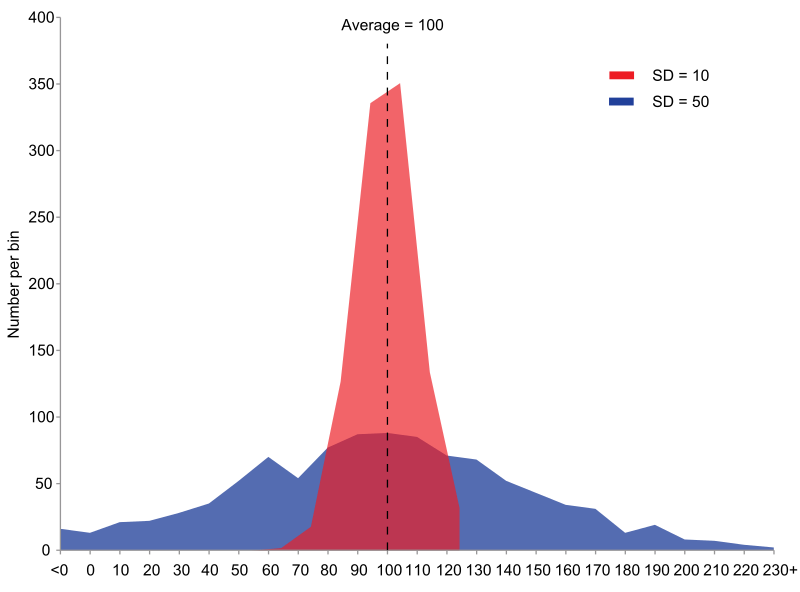

In [33]:
data = [1, 200, 3000, 4, 5, 10000, 4]
statistics.variance(data)

14015966.904761905

In [36]:
statistics.variance(df["Fare"].tolist())

2469.4368457431165

In [37]:
df[["Age","Fare", "Pclass", "SibSp","Parch"]].head()

,Age,Fare,Pclass,SibSp,Parch
PassengerId,,,,,
1,22.0,7.2500,3,1,0
2,38.0,71.2833,1,1,0
3,26.0,7.9250,3,0,0
4,35.0,53.1000,1,1,0
5,35.0,8.0500,3,0,0


In [38]:
df[["Age","Fare", "Pclass"]].head()

,Age,Fare,Pclass
PassengerId,,,
1,22.0,7.2500,3
2,38.0,71.2833,1
3,26.0,7.9250,3
4,35.0,53.1000,1
5,35.0,8.0500,3


In [30]:
#5 columns -> 3 columns
#Most of the information is retained

In [22]:
sample_df = pd.DataFrame.from_dict({"X axis":[10,20,30,40],"Y axis":[100,200,300,400]})
sample_df

,X axis,Y axis
0,10,100
1,20,200
2,30,300
3,40,400


<Axes: xlabel='X axis', ylabel='Y axis'>

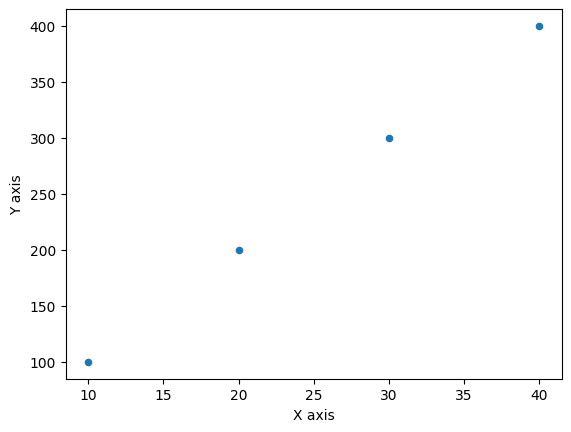

In [24]:
sample_df.plot.scatter(x = "X axis", y = "Y axis")

## Principal Component Analysis

### Impute the missing values with 0

In [44]:
#df[["Age","Fare", "Pclass", "SibSp","Parch"]].fillna(0)

In [40]:
from sklearn.decomposition import PCA

In [52]:
df[["Age","Fare", "Pclass", "SibSp","Parch"]].head()

,Age,Fare,Pclass,SibSp,Parch
PassengerId,,,,,
1,22.0,7.2500,3,1,0
2,38.0,71.2833,1,1,0
3,26.0,7.9250,3,0,0
4,35.0,53.1000,1,1,0
5,35.0,8.0500,3,0,0


Information -> Algo -> Compressed 90% intact Information(10% loss)


In [62]:
pca = PCA(0.90)
pca.fit(df[["Age","Fare", "Pclass", "SibSp","Parch"]].fillna(0))

PCA(n_components=0.9)

df(10 columns) -> ML(100 units of time) -> Predictions
reduced df(2 columns) from PCA -> ML(25 units) -> Predictions

In [63]:
pca.transform(df[["Age","Fare", "Pclass", "SibSp","Parch"]].fillna(0))

array([[-25.01997791,  -0.4459176 ],
       [ 39.80680125,  12.05247761],
       [-24.13097625,   3.52387028],
       ...,
       [-10.03984457, -23.30244839],
       [ -2.07151072,   2.34359338],
       [-23.97795899,   9.52333419]])

Information from `5` columns -> REatin almost all information -> Information in `2` columns

In [60]:
pca = PCA(3)
pca.fit(df[["Age","Fare", "Pclass", "SibSp","Parch"]].fillna(0))

PCA(n_components=3)

In [61]:
pca.transform(df[["Age","Fare", "Pclass", "SibSp","Parch"]].fillna(0))

array([[-25.01997791,  -0.4459176 ,   0.43195184],
       [ 39.80680125,  12.05247761,   0.13180846],
       [-24.13097625,   3.52387028,  -0.39965754],
       ...,
       [-10.03984457, -23.30244839,   0.89393299],
       [ -2.07151072,   2.34359338,  -0.77295236],
       [-23.97795899,   9.52333419,  -0.30695307]])

1000 col data set -> PCA -> 10 column

In [45]:
pca.transform(df[["Age","Fare", "Pclass", "SibSp","Parch"]].fillna(0))

array([[-25.01997791,  -0.4459176 ],
       [ 39.80680125,  12.05247761],
       [-24.13097625,   3.52387028],
       ...,
       [-10.03984457, -23.30244839],
       [ -2.07151072,   2.34359338],
       [-23.97795899,   9.52333419]])

In [46]:
reduced_dimension_df = pd.DataFrame(pca.transform(df[["Age","Fare", "Pclass", "SibSp","Parch"]].fillna(0)))
reduced_dimension_df.columns=["X Axis","Y Axis"]

In [48]:
df[["Age","Fare", "Pclass", "SibSp","Parch"]].head()

,Age,Fare,Pclass,SibSp,Parch
PassengerId,,,,,
1,22.0,7.2500,3,1,0
2,38.0,71.2833,1,1,0
3,26.0,7.9250,3,0,0
4,35.0,53.1000,1,1,0
5,35.0,8.0500,3,0,0


df(5 columns) -> PCA -> approximate df(2 columns)

Variance of (df with 5 columns) -> PCA -> `90%` of variance(df with 2 columns)

X axis, Y axis -> Algo -> New X Axis, New Y Axis

<Axes: xlabel='Age', ylabel='Fare'>

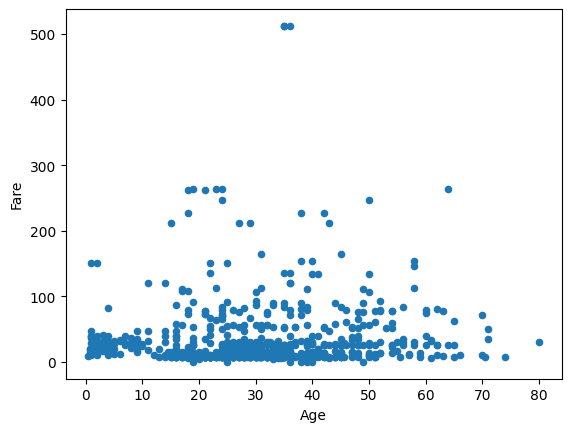

In [59]:
df.plot.scatter(x = "Age", y = "Fare")

https://en.wikipedia.org/wiki/Principal_component_analysis

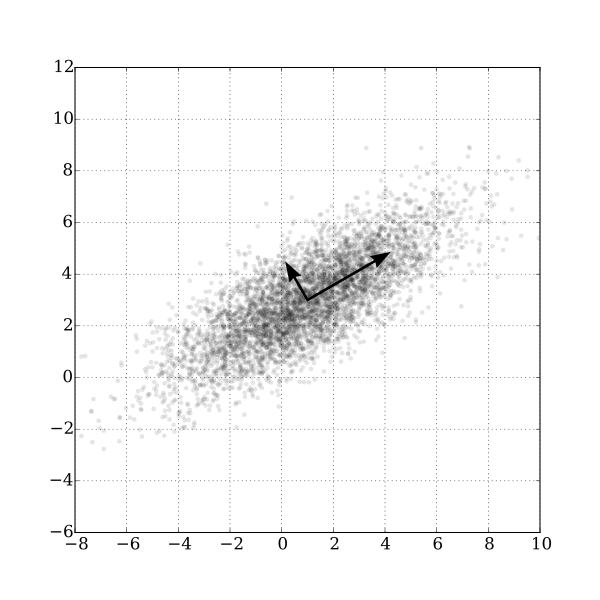

In [47]:
reduced_dimension_df.head()

,X Axis,Y Axis
0,-25.019978,-0.445918
1,39.806801,12.052478
2,-24.130976,3.523870
3,21.487787,10.051837
4,-23.514550,12.501877


In [55]:
df[["Age","Fare", "Pclass", "SibSp","Parch"]].head()

,Age,Fare,Pclass,SibSp,Parch
PassengerId,,,,,
1,22.0,7.2500,3,1,0
2,38.0,71.2833,1,1,0
3,26.0,7.9250,3,0,0
4,35.0,53.1000,1,1,0
5,35.0,8.0500,3,0,0


<Axes: xlabel='X Axis', ylabel='Y Axis'>

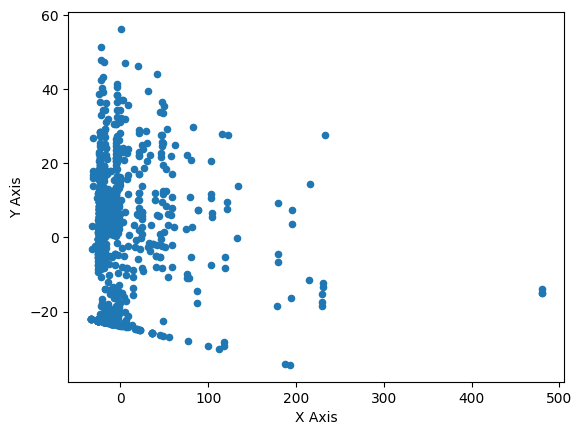

In [54]:
reduced_dimension_df.plot.scatter(x = "X Axis", y = "Y Axis")

In [51]:
pca.explained_variance_ratio_

array([0.89019716, 0.10902036])

- Data Augmentation
- Handling Imbalanced Data
- Data Splitting
- Data Normalization
- Feature Scaling

In [64]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


# Data Augmentation
- Rotation
- Flipping
- Cropping
- Masking
- etc.

200 images -> data augmentation -> 800 images

Training Data -> Model -> Fitted Model<br>
Fitted Model -> Performs good on training data only<br>
Genralization Data -> Model might perform bad<br>

# Imbalnced Data
Target is imbalnced

Ways to solve -
- Under Sampling
- Over Sampling

** Weighted Loss **

In [67]:
df["Survived"].value_counts()/df.shape[0]*100

Survived
0    61.616162
1    38.383838
Name: count, dtype: float64

In [68]:
class1 = 90
class2 = 10

Total = 1000 rows

Class 1 = 100 rows

Class 2 = 900 rows

### Undersampling

Total = 200 rows

Class 1 = 100 rows

Class 2 = 100 rows(randomly pick 100 rows from 900 rows)

### Oversampling
Total = 1800 rows
 
Class 1 = 900 rows(Generate syntehtic data) - `SMOTE`

Class 2 = 900 rows

# Data Splitting
Split the data 
- train
- test
- validation

In [70]:
df.shape

(891, 8)

df(891 rows) -> Fit ML algo -> Fitted model

In [72]:
890-712

178

In [71]:
0.8*890

712.0

### Example of data splitting
df(890 rows)
- train(712 rows)
- test(178 rows)

train -> Fit model -> Fitted Model

test -> Fitted Model -> Testing

In [81]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df,)

In [82]:
df.shape, train.shape, test.shape

((891, 8), (668, 8), (223, 8))

`train` -> `model.fit` -> `fitted_model`

`test` -> `fitted_model` -> Check accuracy